In [27]:
import numpy as np 
import math
import tensorflow as tf
from numpy.ma.core import ceil
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import animation, colors
from sklearn import preprocessing as sk_preprocessing
from sklearn.preprocessing import StandardScaler #normalization
from sklearn.preprocessing import MinMaxScaler #normalization
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix

In [28]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx')
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [29]:
counts = df['Class'].value_counts()
print(counts)

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


In [30]:
X = df.drop('Class', axis = 1)
Y = df['Class']

standard_scaler = StandardScaler()
standard_scaler.fit(X)
X_normalized = standard_scaler.transform(X)
print(X_normalized)

Y_numerized = Y.replace(({'SEKER': 4, 'BARBUNYA' : 2, 'BOMBAY': 3, 'CALI': 0, 'DERMASON': 1, 'HOROZ': 6, 'SIRA': 5}))
print(Y_numerized)

[[-0.84074853 -1.1433189  -1.30659814 ...  2.40217287  1.92572347
   0.83837103]
 [-0.82918764 -1.01392388 -1.39591111 ...  3.10089314  2.68970162
   0.77113842]
 [-0.80715717 -1.07882906 -1.25235661 ...  2.23509147  1.84135576
   0.91675514]
 ...
 [-0.37203825 -0.44783294 -0.45047814 ...  0.28920441  0.33632829
   0.39025114]
 [-0.37176543 -0.42702856 -0.42897404 ...  0.22837538  0.2489734
   0.03644001]
 [-0.37135619 -0.38755718 -0.2917356  ... -0.12777587 -0.2764814
   0.71371948]]
0        4
1        4
2        4
3        4
4        4
        ..
13606    1
13607    1
13608    1
13609    1
13610    1
Name: Class, Length: 13611, dtype: int64


<ipython-input-31-4adf4919df48>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_numerized)


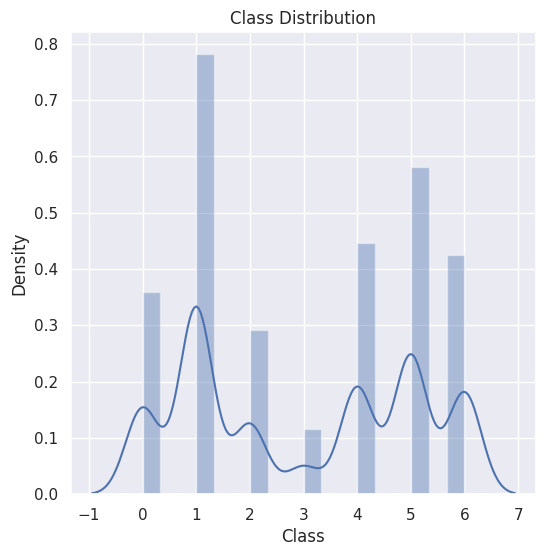

In [31]:
import seaborn as sns

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(Y_numerized)
plt.title('Class Distribution')
plt.show()

In [32]:
# train and test split
train_x, test_x, train_y, test_y = train_test_split(X_normalized, Y_numerized, test_size=0.3, random_state=42)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape) # check the shapes

(9527, 16) (9527,) (4084, 16) (4084,)


In [33]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(16,1)))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
# Train the model
model.fit(train_x, train_y, epochs=30, batch_size=32)

Epoch 1/30
298/298 [==============================] - 3s 8ms/step - loss: 0.2405 - accuracy: 0.9140
Epoch 2/30
298/298 [==============================] - 3s 9ms/step - loss: 0.2303 - accuracy: 0.9143
Epoch 3/30
298/298 [==============================] - 3s 10ms/step - loss: 0.2291 - accuracy: 0.9170
Epoch 4/30
298/298 [==============================] - 3s 10ms/step - loss: 0.2198 - accuracy: 0.9195
Epoch 5/30
298/298 [==============================] - 2s 8ms/step - loss: 0.2217 - accuracy: 0.9198
Epoch 6/30
298/298 [==============================] - 3s 9ms/step - loss: 0.2165 - accuracy: 0.9210
Epoch 7/30
298/298 [==============================] - 3s 8ms/step - loss: 0.2070 - accuracy: 0.9235
Epoch 8/30
298/298 [==============================] - 3s 9ms/step - loss: 0.2113 - accuracy: 0.9225
Epoch 9/30
298/298 [==============================] - 3s 10ms/step - loss: 0.2061 - accuracy: 0.9232
Epoch 10/30
298/298 [==============================] - 3s 9ms/step - loss: 0.2032 - accuracy: 0.9

In [36]:
# Use the trained model to make predictions on the test set
y_pred = model.predict(test_x).argmax(axis=1)

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(test_y, y_pred)
print('Test accuracy:', accuracy)

128/128 [==============================] - 1s 3ms/step
Test accuracy: 0.9240940254652301


In [37]:
cm = confusion_matrix(test_y, y_pred)
print(cm)

[[448   0  15   0   1   5  10]
 [  0 968   0   0  16  55   4]
 [ 29   0 353   0   1   9   3]
 [  0   0   1 160   0   0   0]
 [  0  22   7   0 573  17   0]
 [  0  76   5   0   6 699  13]
 [  2   4   1   0   0   8 573]]


[Text(0.5, 19.049999999999997, ''), Text(46.24999999999999, 0.5, '')]

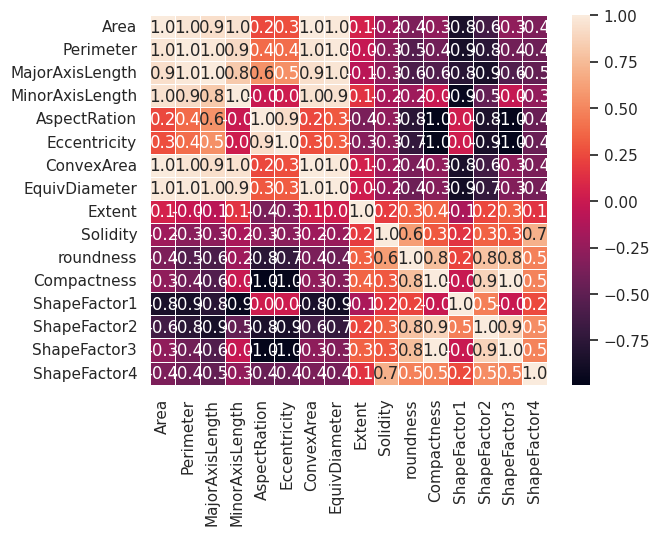

In [38]:
#correlation blw the classes
ax = sns.heatmap(df.corr(), annot=True, linewidth=.5, fmt=".1f")
ax.set(xlabel="", ylabel="")

# MODEL 2

In [39]:
idx = np.where((train_y == 1) | (train_y == 5))[0]
cluster_Y = train_y.iloc[idx]
cluster_Y = np.where(train_y.iloc[idx] == 1, 0, 1) # class 1 becomes 0, class 5 becomes 1

train_x_df = pd.DataFrame(train_x)
cluster_X = train_x_df.iloc[idx]
cluster_X = cluster_X.to_numpy()

In [40]:
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(16,1)))
model1.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model1.add(MaxPooling1D(pool_size=2))

model1.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model1.add(MaxPooling1D(pool_size=2))

model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(2, activation='softmax'))

model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
model1.fit(cluster_X, cluster_Y, epochs=30, batch_size=32)

Epoch 1/30
136/136 [==============================] - 3s 10ms/step - loss: 0.2624 - accuracy: 0.8772
Epoch 2/30
136/136 [==============================] - 1s 10ms/step - loss: 0.1901 - accuracy: 0.9129
Epoch 3/30
136/136 [==============================] - 1s 10ms/step - loss: 0.1823 - accuracy: 0.9198
Epoch 4/30
136/136 [==============================] - 1s 10ms/step - loss: 0.1737 - accuracy: 0.9217
Epoch 5/30
136/136 [==============================] - 1s 7ms/step - loss: 0.1739 - accuracy: 0.9242
Epoch 6/30
136/136 [==============================] - 1s 8ms/step - loss: 0.1704 - accuracy: 0.9258
Epoch 7/30
136/136 [==============================] - 1s 8ms/step - loss: 0.1727 - accuracy: 0.9224
Epoch 8/30
136/136 [==============================] - 1s 8ms/step - loss: 0.1757 - accuracy: 0.9203
Epoch 9/30
136/136 [==============================] - 1s 8ms/step - loss: 0.1702 - accuracy: 0.9265
Epoch 10/30
136/136 [==============================] - 1s 8ms/step - loss: 0.1650 - accuracy: 0.

In [42]:
idx_test = np.where((test_y == 1) | (test_y == 5))[0]
cluster_y_test = test_y.iloc[idx_test]
cluster_y_test = np.where(test_y.iloc[idx_test] == 1, 0, 1) # changing class 1 and 5

test_x_df = pd.DataFrame(test_x)
cluster_x_test = test_x_df.iloc[idx_test]
cluster_x_test = cluster_x_test.to_numpy()

In [43]:
unique_vals, counts = np.unique(test_y.iloc[idx_test], return_counts=True)
print(unique_vals)
print(counts)

[1 5]
[1043  799]


In [44]:
# Use the trained model to make predictions on the test set
cluster_y_pred = model1.predict(cluster_x_test).argmax(axis=1)

# Calculate the accuracy of the model on the test set
accuracy1 = accuracy_score(cluster_y_test, cluster_y_pred)
print('Binary accuracy:', accuracy1)

58/58 [==============================] - 0s 4ms/step
Binary accuracy: 0.9288816503800217


In [45]:
cm1 = confusion_matrix(cluster_y_test, cluster_y_pred)
print(cm1)

[[991  52]
 [ 79 720]]


In [46]:
cluster_y_pred = np.where(cluster_y_pred == 0, 1, 5) # replace with the original label

In [47]:
updated_predicted_classes = np.copy(y_pred)

# replace the predicted classes for class 1 and 5 with the new predicted values
np.put(updated_predicted_classes, idx_test, cluster_y_pred)

accuracy_2stage = accuracy_score(test_y, updated_predicted_classes)
print('Test accuracy:', accuracy_2stage)

Test accuracy: 0.93486777668952


In [48]:
cm2 = confusion_matrix(test_y, y_pred)
print(cm2)

[[448   0  15   0   1   5  10]
 [  0 968   0   0  16  55   4]
 [ 29   0 353   0   1   9   3]
 [  0   0   1 160   0   0   0]
 [  0  22   7   0 573  17   0]
 [  0  76   5   0   6 699  13]
 [  2   4   1   0   0   8 573]]


# DISCUSSION ABOUT OUR RESULT

## What did we do to improve the code?
We performed convolutional neural networks on the dry bean dataset. To do this, we split our dataset into testing and training data and ran the first model to obtain the accuracy of each epoch. We got an average accuracy score of 92%. To increase the accuracy, we first sought to understand the confusion matrix and identify the classes that were misclasssified. The confusion matrix shows that classes 1 and 5 were the most misclassified. 

We used this information of our result to build a second model for classes 1 and 5 of our training dataset and reevaluate the accuracy, which resulted in an increase to 93%. 


## Why did we do it and what is the difference between the two models we used?
As we mentioned, we reevaluated our confusion matrix and use the mismatched classes to build a second model in order to increase the accuracy of our training dataset and reduce the mismatch of our classes. 
The difference between the two models is that Model 1 focused on all of the classes while Model 2 only focused on the mismatch classes( 1 and 5).